# <center> An Introduction to Deep Learning With Python <center/>

### [7.3] Text-classification model to use with TensorBoard
Prof. Yuzo Iano

pgs: 253 - 252

#### Text-classification model to use with TensorBoard

In [1]:
import keras
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
model = Sequential()
model.add(Embedding(max_features, 128,input_length=max_len,name='embed'))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 

#### Creating a directory for TensorBoard log files

Create a folder with the name which we will call in log_dir of function callbacks, the folder should in the same directory where you save your works.

#### Training the model with a TensorBoard callback

In [4]:
callbacks = [keras.callbacks.TensorBoard(log_dir='./my_log_dir',
                                         histogram_freq=1,
                                         embeddings_freq=1,
                                         embeddings_data = x_train[:100],
                                         )
            ]

In [5]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6495 - acc: 0.6492 - val_loss: 0.4255 - val_acc: 0.8214
Epoch 2/20
20000/20000 [==============================] - 39s 2ms/step - loss: 0.4609 - acc: 0.8235 - val_loss: 0.4317 - val_acc: 0.8216
Epoch 3/20
20000/20000 [==============================] - 38s 2ms/step - loss: 0.4198 - acc: 0.7986 - val_loss: 0.5078 - val_acc: 0.7836
Epoch 4/20
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3518 - acc: 0.8038 - val_loss: 0.5808 - val_acc: 0.7338
Epoch 5/20
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3266 - acc: 0.7459 - val_loss: 0.6988 - val_acc: 0.6388
Epoch 6/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2771 - acc: 0.7104 - val_loss: 0.5898 - val_acc: 0.6642
Ins

After training the model, you should have some files in the folder created, now you open the Anaconda prompt and activate the environment and come in for the address of the folder. For add folders in the command prompt (cd name of the folder), finally, you put the next code for active the TensorBoar.
* tensorboard --logdir=my_log_dir

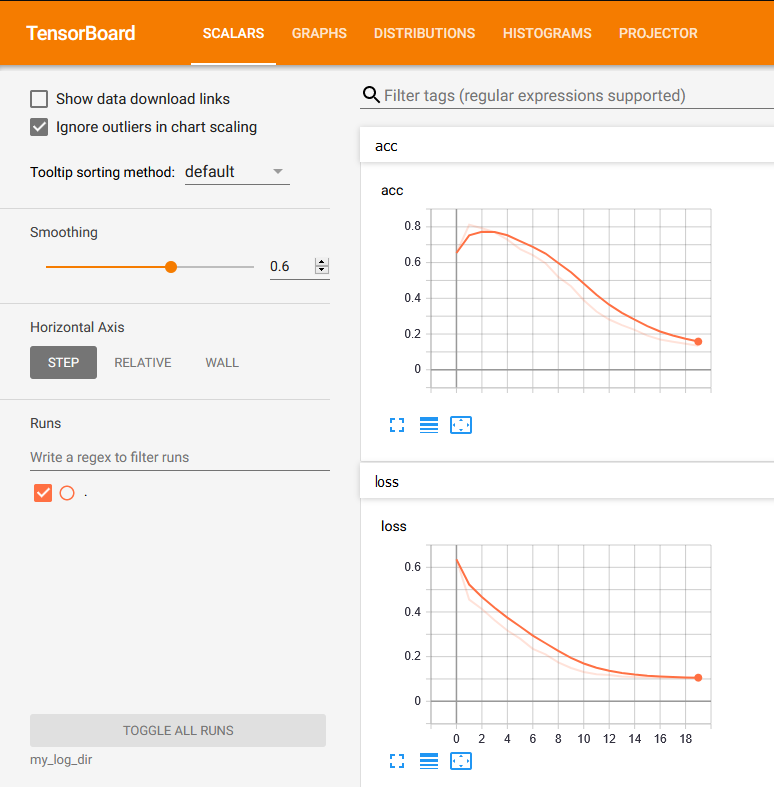

In [6]:
from IPython.display import Image
Image(filename='scalars.PNG', width=700, height=800)

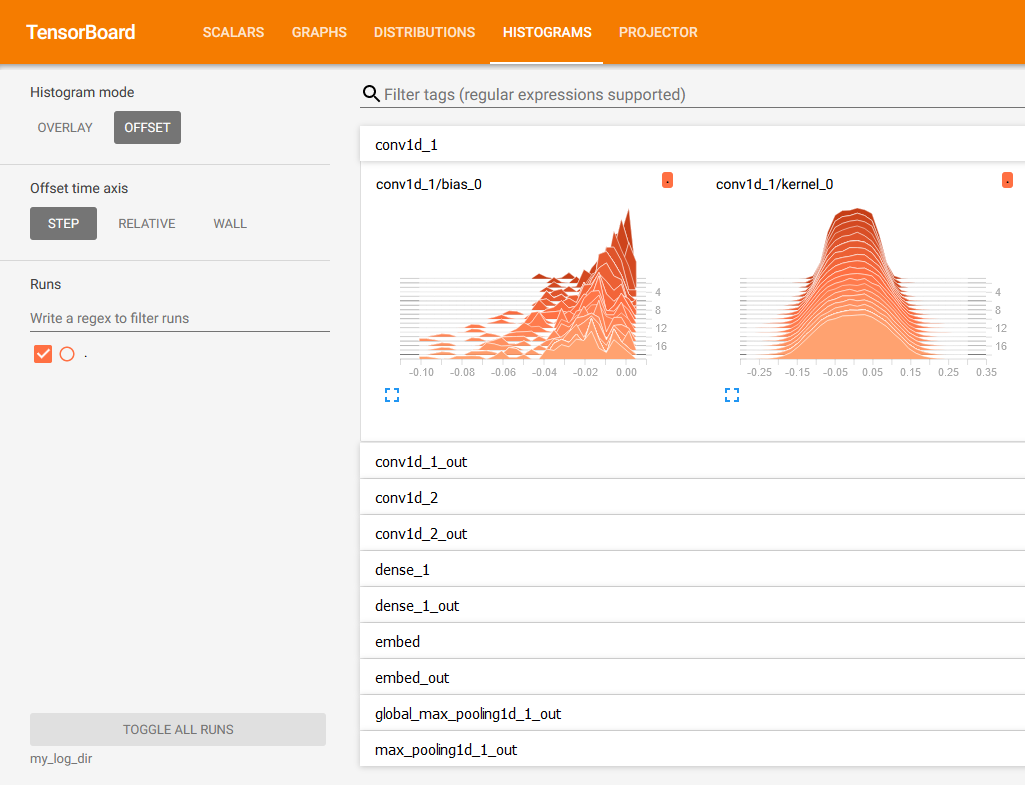

In [7]:
Image(filename='histograms.PNG', width=700, height=800)

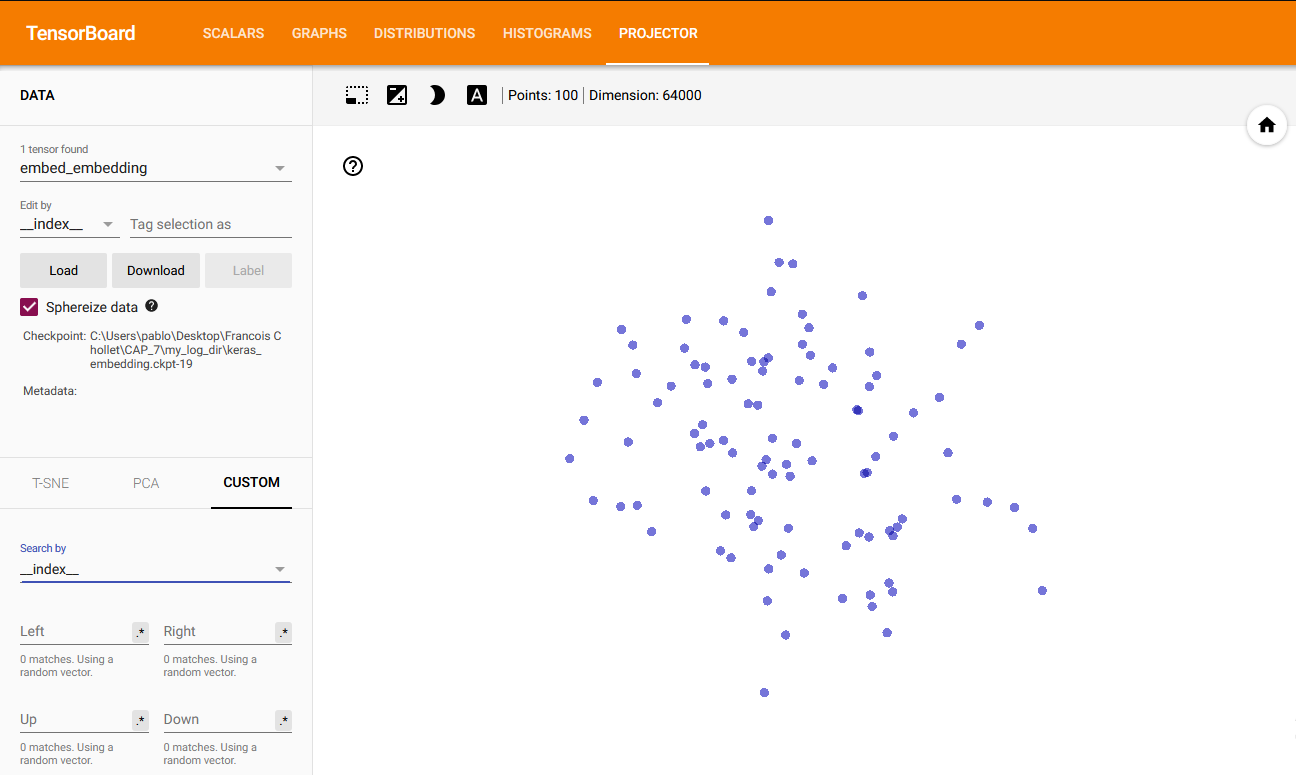

In [8]:
Image(filename='embeddings.PNG', width=700, height=800)

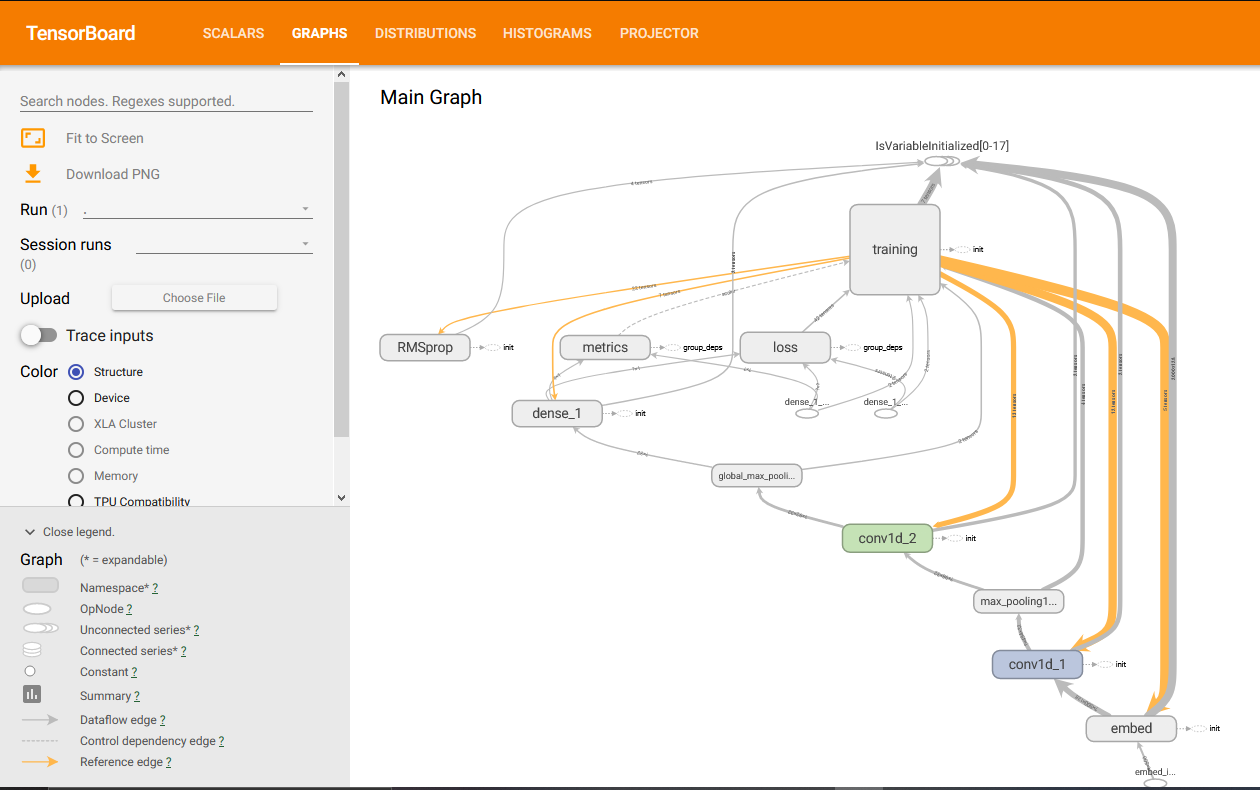

In [9]:
Image(filename='graphs.PNG', width=700, height=800)

###### Pablo Minango
* pablodavid218@gmail.com 